# Introduction to Neural Networks

## Import packages

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [5]:
X_train[0].shape

(28, 28)

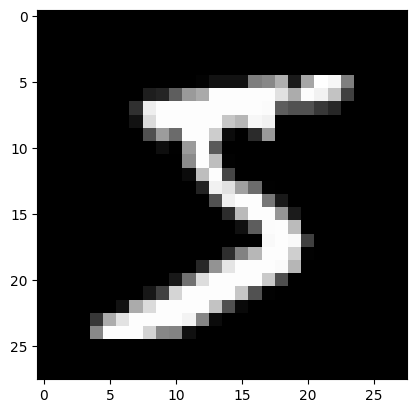

In [6]:
plt.imshow(X_train[0],cmap='gray')

In [7]:
y_train[0]

5

## Preprocessing the image data

In [8]:
image_height,image_width = 28,28

In [9]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

![NeuralNet](images/neural-net.png)

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
nr_of_inputs_first_layer = 784

# this is the 28*28 images

nodes_first_layer = 512
bias = 512
nr_of_params = nr_of_inputs_first_layer * nodes_first_layer + bias
nr_of_params  # this corresponds with the Param nr of the first layer.

401920

In [21]:
# the nr of parameters in second layer is calculated by the nr of input nodes, current parameters and bias
input_nodes_second_layer = 512 # these are the ones 
nodes_second_layer = 512
bias_second_layer = 512
nr_of_params_second_layer = input_nodes_second_layer * nodes_second_layer+bias_second_layer
nr_of_params_second_layer

262656

In [24]:
# the number of inputs
input_nodes_third_layer = 512

# the number of outputs
nodes_third_layer = 10

#bias - which apparently is equal with the number of outputs
bias_third_layer = 10

# calculating the number of params
nr_of_params_third = input_nodes_third_layer * nodes_third_layer + bias_third_layer
nr_of_params_third

5130

## Train the model

In [25]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1818 - accuracy: 0.9438 - val_loss: 0.0895 - val_accuracy: 0.9720
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0796 - accuracy: 0.9752 - val_loss: 0.0940 - val_accuracy: 0.9717
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0564 - accuracy: 0.9818 - val_loss: 0.0910 - val_accuracy: 0.9733
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0943 - val_accuracy: 0.9716
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0892 - val_accuracy: 0.9779
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0747 - val_accuracy: 0.9818
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0233 - accuracy: 0.9921 - val_loss: 0.0798 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

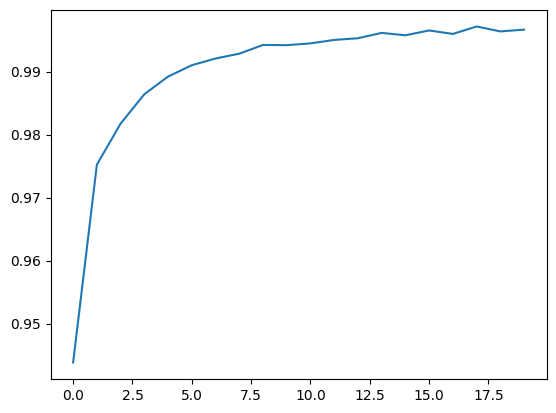

In [30]:
plt.plot(history.history['accuracy'])


### Plot the accuracy of training and validation set

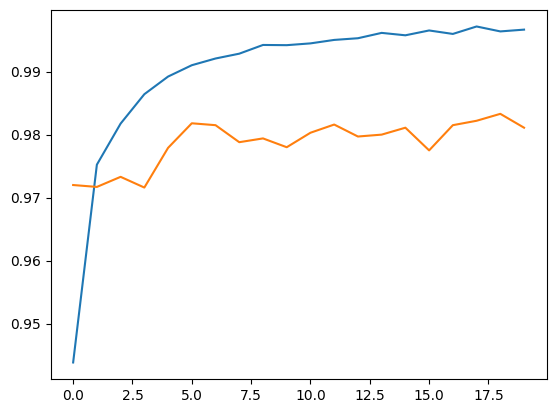

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

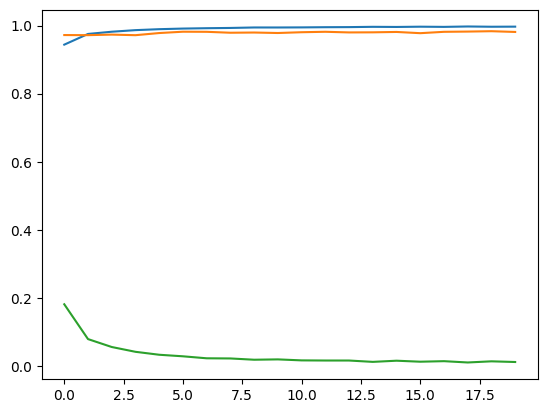

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluate method

We can also check the accuracy of the model using the evaluate method

In [35]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9811


[0.13666751980781555, 0.9811000227928162]

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

In [55]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(784,)))
model2.add(Dense(1024, activation='tanh'))
model2.add(Dense(512, activation='tanh'))
model2.add(Dense(10, activation='softmax'))

In [56]:
# Compile a model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
# show summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 1024)              525312    
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1457162 (5.56 MB)
Trainable params: 1457162 (5.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# train the model
history2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2072 - accuracy: 0.9383 - val_loss: 0.1378 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1063 - accuracy: 0.9686 - val_loss: 0.1266 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0796 - accuracy: 0.9764 - val_loss: 0.1011 - val_accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0655 - accuracy: 0.9805 - val_loss: 0.0895 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0564 - accuracy: 0.9833 - val_loss: 0.1033 - val_accuracy: 0.9715
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0925 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.0927 -

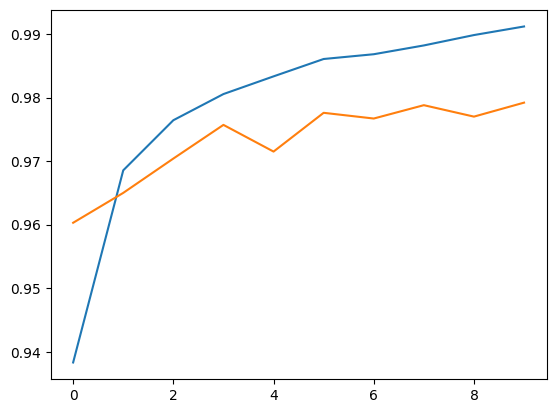

In [59]:
# accuracy of training with validation and loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
# plt.plot(history2.history['loss'])


In [60]:
print(type(history2))
print(history2.history.keys())

for key in history2.history:
    if key=="accuracy":
        print(key)
        print(history2.history.get(key))
        acc_lst = history2.history.get(key)
        for i in range(len(acc_lst)):
            if acc_lst[i]==max(acc_lst):
                print("The epock number " + str(i+1) + " has the highest accuracy: " + str(acc_lst[i]))

<class 'keras.src.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
accuracy
[0.9383166432380676, 0.9685500264167786, 0.9764333367347717, 0.9805499911308289, 0.9833333492279053, 0.9860666394233704, 0.9868166446685791, 0.9882000088691711, 0.9898333549499512, 0.991183340549469]
The epock number 10 has the highest accuracy: 0.991183340549469


In [62]:
# use the evaluate function
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.9811


[0.13666751980781555, 0.9811000227928162]

# Work with fashion mnist dataset

### also has 10 output classes so similar 

Gives the chance to work on the data preparing part as well as in designing the model.

# Convolution Neural Network

## Import the libraries

In [64]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [65]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [71]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [72]:
num_classes = 10
epochs = 3


X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [100]:
# Creating the model

cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=(5,5), input_shape = (28, 28, 1), padding="same", activation='relu'))

In [101]:
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D())


In [102]:
# The reason why you would need to flatten is because you have a Dense or fully connected network next. 
cnn.add(Flatten())

In [103]:
cnn.add(Dense(1024, activation='relu'))

# add another layer which will have the 10 bins, or 10 output classes
# because its the output layer, or the bin layer, it needs to contain the number of outputs, alongside the softmax activation.
# the softmax will quantify the values of what we got from the previous layers. 

cnn.add(Dense(10, activation='softmax'))

In [104]:
# now we compile the module:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
# to confirm the model looks as we intend to, we can use the summary function

print(cnn.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_17 (Dense)            (None, 1024)             

In [109]:
# history_cnn = cnn.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_train,y_train))

# there is an alternative way to measure the weights by using keras by using load_weights()
cnn.load_weights('cnn-model5.h5')

Epoch 1/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.0134 - val_accuracy: 0.9963
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0043 - val_accuracy: 0.9986
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 5/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0080 - accuracy: 0.9978 - val_loss: 0.0038 - val_accuracy: 0.9990


In [113]:
score = cnn.evaluate(X_test, y_test)
score

313/313 [==============================] - 2s 7ms/step - loss: 0.0268 - accuracy: 0.9930


[0.026782654225826263, 0.9929999709129333]

Recall that when using neural networks we got good accuracy.

the cnn results were 0.993 while the nn results were 0.978

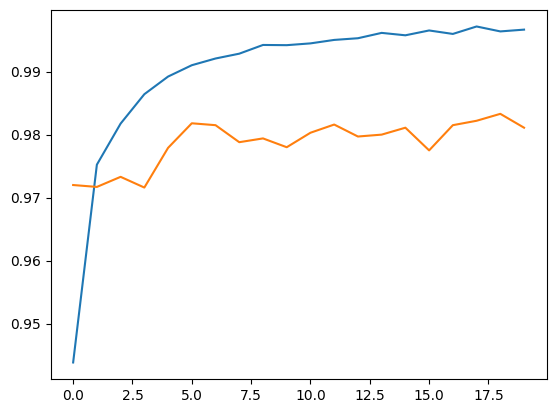

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Comparing this to using CNNs - the performance is far superior.

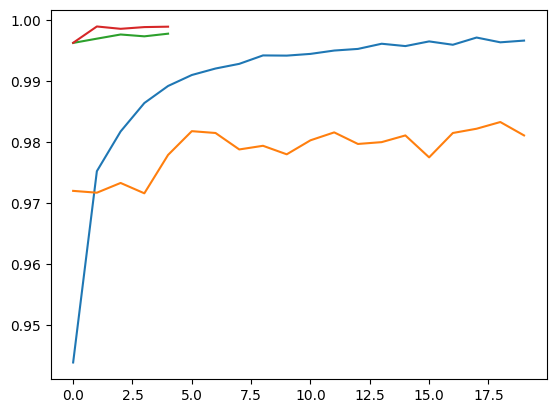

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

## Not related just testing out files

In [119]:
# %pip install pandas
# import pandas as pd

# can install and play with pandas later.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ImportError: DLL load failed while importing writers: %1 is not a valid Win32 application.

In [5]:
# df = pd.read_csv('data/olympics.csv',skiprows=4)
# df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## Enhancememnts to CNNs

### Dropout
- prevents overfitting. Does so by randomly killing each neuron in a training set with probability p.
The probability is determined by user, and the common choice is p=0.5
- it is only done on the training data.
### Image augmentation 
- is the process of taking images already in a training dataset, and manipulate them to create many altered versions of the same image.
- Offers more images to the model which is good, plus offers different versions of images such as reflections - making the model more robust.

In [130]:
import numpy as np

In [131]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input

Looking at the files sample-train and sample-confirm, we have the cats and dogs folders in the train folder, and no images in the confirm one.
The purpose is to populate the sample-confirm folder with additional pictures derrived from the existing ones.
- For this, we can use ImageDataGenerator function


In [132]:
train_datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
jf_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True
)

In [133]:
train_generator = train_datagen.flow_from_directory('images/sample-train/', target_size=(150,150), save_to_dir='images/sample-confirm/')

Found 6 images belonging to 2 classes.


In [129]:
# %pip install scipy
import scipy
i=0
for batch in train_datagen.flow_from_directory('images/sample-train/', target_size=(150,150), save_to_dir='images/sample-confirm/'):
    i+=1
    if (i>10):
        break

Found 6 images belonging to 2 classes.


NameError: name 'scipy' is not defined